In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from tabulate import tabulate


from src.train import train, test
from src.models import Simple3BlockCNN, BNDropout3BlockCNN, AIDetectorResNet
from src.utils import split_data, print_history

Using device: mps


# AI Detection

In [2]:
BATCH_SIZE = 32
TRAIN_SIZE = 0.8
EPOCHS = 30
LEARNING_RATE = 1e-3
PATIENCE = 5

train_loader, val_loader, test_loader = split_data(root_dir="data/ai-images", batch_size=BATCH_SIZE)

           Train    Val    Test
-------  -------  -----  ------
Samples      312     38      40
Batches       10      2       2


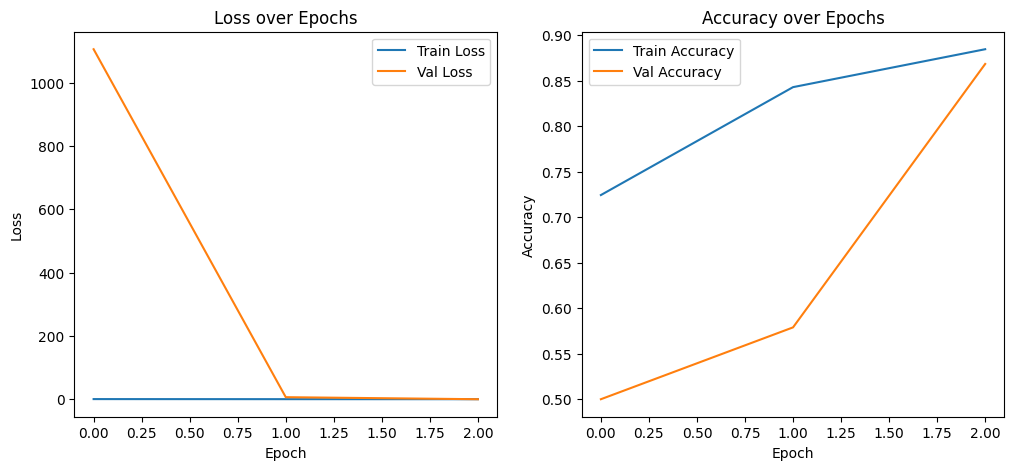

Epoch 3/30
  Train Loss: 0.3203, Train Acc: 0.8846
  Val   Loss: 0.2634, Val   Acc: 0.8684
  Best Val Acc: 0.8684 at Epoch 3
  Learning Rate: 0.001000


Training: 100%|██████████| 10/10 [00:10<00:00,  1.32it/s]

In [ ]:
model = AIDetectorResNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)

history = train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    epochs=EPOCHS,
    patience=PATIENCE
)

# Testing

In [ ]:
model = AIDetectorResNet()
model_path = "models/AIDetectorResNet/run_3/best_model.pth"
model.load_state_dict(torch.load(model_path))

criterion = nn.BCEWithLogitsLoss()

test_result = test(model=model,
                   test_loader=test_loader,
                   criterion=criterion)

In [ ]:
table_data = [
    ["Simple3BlockCNN", round(test_result[0], 3), test_result[1]]
]

headers = ["Model", "Loss", "Accuracy"]

print(tabulate(table_data, headers=headers))